### This code is used to preprocess images, convert them to arrays, add labels and serialize the data 

In [1]:
pwd

'/Users/connormacrossiesmith/All Python'

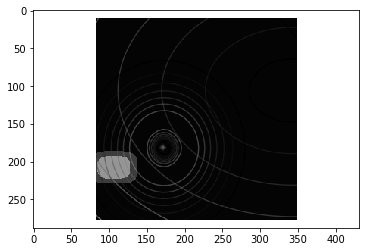

In [2]:
import cv2 #do image operations 
import numpy as np
import os
import matplotlib.pyplot as plt
import random

DATADIR = "Synthetic_Data"
CATEGORIES = ["Neg_Training_Data","Pos_Training_Data"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        #I am using grayscale on my cpu mac becuase of space and also haven't resolved issue
        #trying to do color.. 
        plt.imshow(img_array, cmap='gray')
        
        plt.show()
        break
    break
    
#Not sure about sizing to fit axes

In [3]:
print(img_array.shape)

(288, 432)


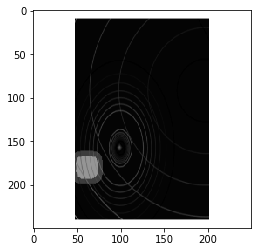

In [4]:
IMG_SIZE= 250 # 100 # works for grayscale 

new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
#new_array = cv2.resize(img_array, (432,288))

plt.imshow(new_array, cmap ='gray')
plt.show()

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category) #0 for neg, 1 for pos
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))               
                training_data.append([new_array, class_num])
            except Exception as e: 
                pass # if there are some iffy images, exception overrides those
            
create_training_data()

In [6]:
print(len(training_data)) #number of samples

1000


In [7]:
random.shuffle(training_data) #goes from ordered data to random

for sample in training_data[:10]:
    print(sample[1]) #for labels

1
0
1
1
0
0
0
1
1
0


In [8]:
#now that the data is shuffled it can be packed into variables used to fed into NN

X1=[]
y1 =[] 

#can specify validation set, but use built in methods laterz

In [9]:
for features, label in training_data:
    X1.append(features)
    y1.append(label) #lists, y can stay a list, but X has to be numpy array

    #convert X list to
    
X1 = np.array(X1).reshape(-1,IMG_SIZE,IMG_SIZE,1)#1 because it is a grayscale, can do 3 for color
#X = np.array(X).reshape(IMG_SIZE,IMG_SIZE,-1)# does this work for color? 3 in last? 



#have to reshape X, if there is an issue restart the kernel
print(X1.shape) # (n_images, x_shape, y_shape, channels).

(1000, 250, 250, 1)


In [10]:
countN=y1.count(0)
print('The number of negative samples is', countN)

The number of negative samples is 500


In [11]:
#now save the data, didn't have to do pickle can also do numpy.save

import pickle #pickle implements binary protocols for serializing and de-serializing a Python object structure. 

pickle_out=open("X1.pickle","wb") #wb write binary, rb read binary
pickle.dump(X1, pickle_out)
pickle_out.close()


pickle_out=open("y1.pickle","wb")
pickle.dump(y1,pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X1.pickle","rb")
X1 = pickle.load(pickle_in)

In [13]:
X1[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)